In [1]:
import numpy as np

# Velocity Kinematics and Statics

## General


Considering the case where teh end-effector configuration is represented by a minimal set of coordinates $x \in \mathbb{R^m}$
 and the velocity is given by $\dot{x} = \frac{dx}{dt} \in \mathbb{R^m}$ .In this case,the forward kinematics can be writen as 
$$
x(t) = f( \theta (t) ),
$$

where $\theta \mathbb{R^n}$ is a set of joint variables.


$$
\dot{x} = \frac{\partial f(\theta)}{\partial \theta} \frac{d\theta(t)}{dt} = \frac{\partial f(\theta)}{\partial \theta} \dot{\theta} = J(\theta) \dot{\theta}
$$

where $J(\theta) \mathbb{R^{m \times n}}$ is the Jacobian


In [ ]:
L1 = 10
L2 = 10

theta1 = np.pi/16
theta2 = np.pi/32

x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)


x1_dot = -L1 * np.sin(theta1) * 0.5 - L2 *  (theta1_dot + theta2_dot) * np.cos(theta1 + theta2)
x2_dot = L1 * theta1_dot * np.cos(theta1) + L2 * (theta1_dot + theta2_dot) * np.cos(theta1 + theta2)


Jac_matrix = np.array([
    [-L1 * np.sin(theta1) - L2 * np.sin(theta1 + theta2), -L2 * np.sin(theta1 + theta2)],
    [L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2), L2 * np.cos(theta1 + theta2)],
]) # @ np.array([x1_dot, x2_dot]).T


$$
v_{tip} = J_1(\theta) \dot{\theta_1} + J_2(\theta) \dot{\theta_2}
$$

In [4]:
def makeJac(L1, L2, theta1, theta2):
    return np.array([
        [-L1 * np.sin(theta1) - L2 * np.sin(theta1 + theta2), -L2 * np.sin(theta1 + theta2)],
        [L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2), L2 * np.cos(theta1 + theta2)],
    ])  # @ np.array([x1_dot, x2_dot]).T


makeJac(1,1,0, 3* np.pi/4)

array([[-0.70710678, -0.70710678],
       [ 0.29289322, -0.70710678]])

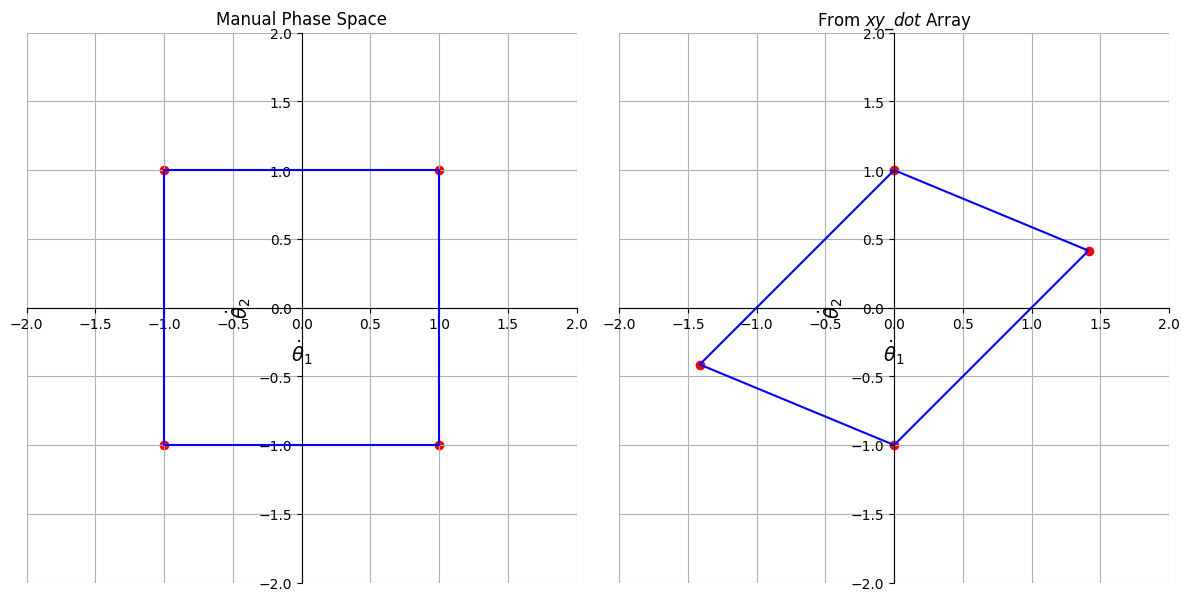

In [24]:
import matplotlib.pyplot as plt

# Define square corners
theta1 = [1, -1, -1, 1, 1]
theta2 = [1, 1, -1, -1, 1]

theta = np.vstack((theta1, theta2))

xy_dot = makeJac(1,1,0, 3* np.pi/4) @ theta 

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# --- First subplot ---
axes[0].plot(theta1, theta2, 'b-')
axes[0].scatter(theta1[:-1], theta2[:-1], color='red')
axes[0].spines['left'].set_position('zero')
axes[0].spines['bottom'].set_position('zero')
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')
axes[0].set_xlabel(r'$\dot{\theta}_1$', fontsize=14)
axes[0].set_ylabel(r'$\dot{\theta}_2$', fontsize=14)
axes[0].set_aspect('equal')
axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2, 2)
axes[0].grid(True)
axes[0].set_title("Manual Phase Space")

# --- Second subplot ---
axes[1].plot(xy_dot[0, :], xy_dot[1, :], 'b-')
axes[1].scatter(xy_dot[0, :-1], xy_dot[1, :-1], color='red')
axes[1].spines['left'].set_position('zero')
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].set_xlabel(r'$\dot{\theta}_1$', fontsize=14)
axes[1].set_ylabel(r'$\dot{\theta}_2$', fontsize=14)
axes[1].set_aspect('equal')
axes[1].set_xlim(-2, 2)
axes[1].set_ylim(-2, 2)
axes[1].grid(True)
axes[1].set_title("From $xy\_dot$ Array")

# Tight layout
plt.tight_layout()
plt.show()

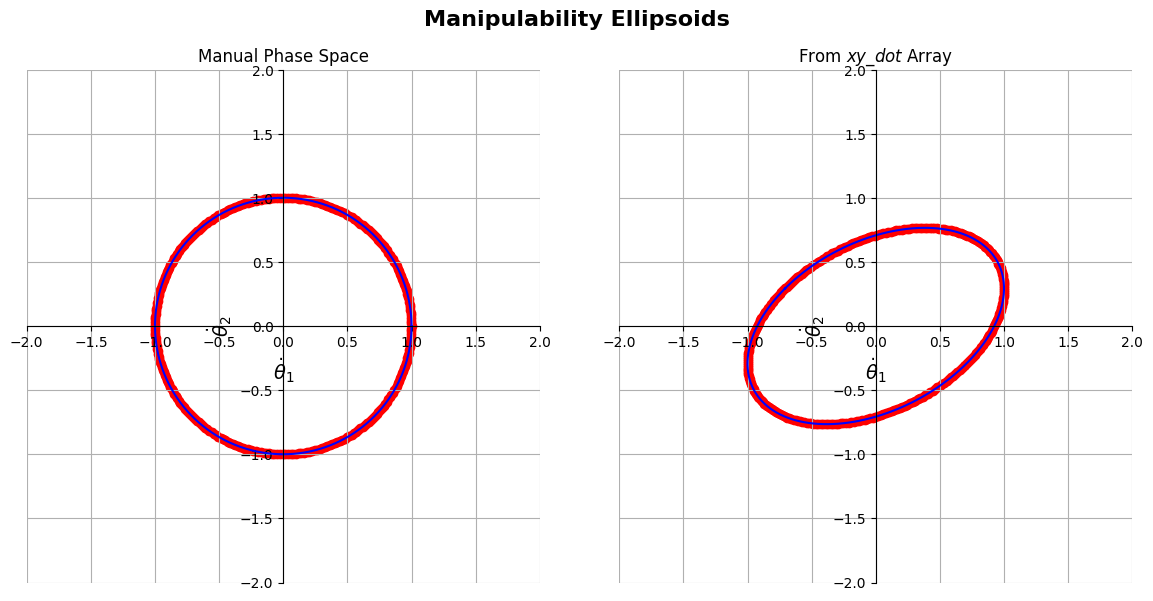

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generate circle points
theta = np.linspace(0, 2 * np.pi, 300)
theta1 = np.cos(theta)
theta2 = np.sin(theta)


theta = np.vstack((theta1, theta2))
xy_dot = makeJac(1,1,0, 3* np.pi/4) @ theta 

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# --- First subplot ---
axes[0].plot(theta1, theta2, 'b-')
axes[0].scatter(theta1[:-1], theta2[:-1], color='red')
axes[0].spines['left'].set_position('zero')
axes[0].spines['bottom'].set_position('zero')
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')
axes[0].set_xlabel(r'$\dot{\theta}_1$', fontsize=14)
axes[0].set_ylabel(r'$\dot{\theta}_2$', fontsize=14)
axes[0].set_aspect('equal')
axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2, 2)
axes[0].grid(True)
axes[0].set_title("Manual Phase Space")

# --- Second subplot ---
axes[1].plot(xy_dot[0, :], xy_dot[1, :], 'b-')
axes[1].scatter(xy_dot[0, :-1], xy_dot[1, :-1], color='red')
axes[1].spines['left'].set_position('zero')
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].set_xlabel(r'$\dot{\theta}_1$', fontsize=14)
axes[1].set_ylabel(r'$\dot{\theta}_2$', fontsize=14)
axes[1].set_aspect('equal')
axes[1].set_xlim(-2, 2)
axes[1].set_ylim(-2, 2)
axes[1].grid(True)
axes[1].set_title("From $xy\_dot$ Array")

# Tight layout
fig.suptitle("Manipulability Ellipsoids", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Give space for title
plt.show()


### Conservation of Power Argument

Assuming negligible power is used to move the robot, the power at the tip must equal the power at the joints.

Let:

$
\mathbf{f}_{\text{tip}}: \text{ force vector at the robot's tip}
$

$
\boldsymbol{\tau}: \text{ torque vector at the joints}
$

$
\mathbf{v}_{\text{tip}}: \text{ velocity at the tip}
$

$
\dot{\boldsymbol{\theta}}: \text{ joint velocity vector}
$

$
J(\boldsymbol{\theta}): \text{ Jacobian matrix}
$


Then, the conservation of power gives:

$$
\mathbf{f}_{\text{tip}}^T \mathbf{v}_{\text{tip}} = \boldsymbol{\tau}^T \dot{\boldsymbol{\theta}}
$$

Since $ \mathbf{v}_{\text{tip}} = J(\boldsymbol{\theta}) \dot{\boldsymbol{\theta}} $, we substitute to get:

$$
\mathbf{f}_{\text{tip}}^T J(\boldsymbol{\theta}) \dot{\boldsymbol{\theta}} = \boldsymbol{\tau}^T \dot{\boldsymbol{\theta}}
$$

This must hold for all $ \dot{\boldsymbol{\theta}} \$, so we conclude:

$$
\boldsymbol{\tau} = J^T(\boldsymbol{\theta}) \mathbf{f}_{\text{tip}}
$$


## Manipulator Jacobian

### Space Jacobian

Using three properties

(i) If $A, B \in \mathbb{R}^{n \times n}$ are both invertible, then:

$$
(AB)^{-1} = B^{-1} A^{-1}
$$

(ii) If $A \in \mathbb{R}^{n \times n}$ is constant and $\theta(t)$ is a scalar function of $t$, then:

$$
\frac{d}{dt}\left(e^{A\theta(t)}\right) = A e^{A\theta(t)} \dot{\theta}(t) = e^{A\theta(t)} A \dot{\theta}(t)
$$

(iii) The inverse of the matrix exponential satisfies:

$$
\left(e^{A\theta}\right)^{-1} = e^{-A\theta}
$$




Considering an n-link open chain whose forward kinematics is expressed in the following product of the exponentials form:

$$
T(\theta_1, \ldots, \theta_n) = e^{[S_1] \theta_1} \, e^{[S_2] \theta_2} \cdots e^{[S_n] \theta_n} M
$$

The spatial twist $V_s$ is given by $ [\mathbf{V}_s] = \dot{T} \times {T}^{-1}$

$$
\dot{T} =
[S_1] \dot{\theta}_1 e^{[S_1] \theta_1} \cdots e^{[S_n] \theta_n} M
+ e^{[S_1] \theta_1} [S_2] \dot{\theta}_2 e^{[S_2] \theta_2} \cdots e^{[S_n] \theta_n} M
+ \cdots
$$

$$
T^{-1} = M^{-1} e^{-[S_n]\theta_n} \cdots e^{-[S_1]\theta_1}
$$

By mutliplying above terms:

The spatial velocity \( \mathbf{V}_s \) is given by:

$$
\mathbf{V}_s = 
\underbrace{\mathbf{S}_1}_{\text{Js}_1} \dot{\theta}_1 + 
\underbrace{\text{Ad}_{e^{[S_1] \theta_1}} (\mathbf{S}_2)}_{\text{Js}_2} \dot{\theta}_2 + 
\underbrace{\text{Ad}_{e^{[S_1] \theta_1} e^{[S_2] \theta_2}} (\mathbf{S}_3)}_{\text{Js}_3} \dot{\theta}_3 + \cdots
$$


### example


![Space Jacobian for a spatial RRRP chain.](./assets/Fig5_7.png)

In [ ]:
# example 


w_s1 = np.array([0, 0, 1])
q_s1 = np.array([0, 0, 0])

w_s2 = np.array([0, 0, 1])
q_s2 = np.array([L1 * np.cos(theta1), L1*np.sin(theta1), 0])

w_s3 = np.array([0, 0, 1])
q_s3 = np.array([L1 * np.sin(theta1) + L2 * np.cos(theta1 + theta2), -L1*cos() + L2*, 0])

v_s1 = -1 * np.cross(w_s1, q_s1)
v_s2 = -1 * np.cross(w_s2, q_s2)
v_s3 = -1 * np.cross(w_s3, q_s3)


array([0, 0, 0])